In [94]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [95]:
X=np.loadtxt('ex2x.dat')
Y=np.loadtxt('ex2y.dat')

In [96]:
print(X.shape)
print(Y.shape)

(50,)
(50,)


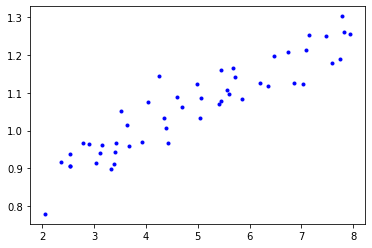

In [97]:
#now to plot this data
plt.plot(X,Y,'b.')#here we will have to pass the third parameter that we want a doted plot
plt.show()

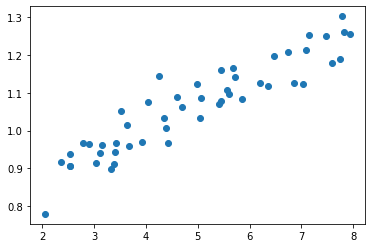

In [98]:
#another way to plot this 
plt.scatter(X,Y)
plt.show()

In [99]:
X

array([2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079 , 2.7866882,
       2.9116825, 3.035627 , 3.1146696, 3.1582389, 3.3275944, 3.3793165,
       3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462,
       4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443,
       4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623,
       5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914,
       6.1978026, 6.3510941, 6.4797033, 6.7383791, 6.8637686, 7.0223387,
       7.0782373, 7.1514232, 7.4664023, 7.5973874, 7.7440717, 7.7729662,
       7.8264514, 7.9306356])

In [100]:
#now to conver X , Y and theta into pytorch tensors
X=torch.from_numpy(X.astype(np.float32))

In [101]:
Y=torch.from_numpy(Y.astype(np.float32))

In [102]:
X

tensor([2.0659, 2.3684, 2.5400, 2.5421, 2.5491, 2.7867, 2.9117, 3.0356, 3.1147,
        3.1582, 3.3276, 3.3793, 3.4122, 3.4216, 3.5316, 3.6393, 3.6733, 3.9256,
        4.0499, 4.2483, 4.3440, 4.3827, 4.4231, 4.6102, 4.6881, 4.9777, 5.0360,
        5.0685, 5.4161, 5.4396, 5.4563, 5.5698, 5.6016, 5.6878, 5.7216, 5.8539,
        6.1978, 6.3511, 6.4797, 6.7384, 6.8638, 7.0223, 7.0782, 7.1514, 7.4664,
        7.5974, 7.7441, 7.7730, 7.8265, 7.9306])

In [103]:
Y

tensor([0.7792, 0.9160, 0.9054, 0.9057, 0.9390, 0.9668, 0.9644, 0.9145, 0.9393,
        0.9607, 0.8984, 0.9121, 0.9424, 0.9662, 1.0526, 1.0144, 0.9597, 0.9685,
        1.0766, 1.1455, 1.0341, 1.0070, 0.9668, 1.0896, 1.0634, 1.1237, 1.0323,
        1.0874, 1.0703, 1.1606, 1.0778, 1.1070, 1.0972, 1.1649, 1.1412, 1.0844,
        1.1252, 1.1168, 1.1971, 1.2069, 1.1251, 1.1236, 1.2133, 1.2523, 1.2497,
        1.1800, 1.1897, 1.3030, 1.2601, 1.2562])

In [104]:
Y=Y.view(Y.shape[0],1)
X.unsqueeze_(1)
Y.unsqueeze_(1)

tensor([[[0.7792]],

        [[0.9160]],

        [[0.9054]],

        [[0.9057]],

        [[0.9390]],

        [[0.9668]],

        [[0.9644]],

        [[0.9145]],

        [[0.9393]],

        [[0.9607]],

        [[0.8984]],

        [[0.9121]],

        [[0.9424]],

        [[0.9662]],

        [[1.0526]],

        [[1.0144]],

        [[0.9597]],

        [[0.9685]],

        [[1.0766]],

        [[1.1455]],

        [[1.0341]],

        [[1.0070]],

        [[0.9668]],

        [[1.0896]],

        [[1.0634]],

        [[1.1237]],

        [[1.0323]],

        [[1.0874]],

        [[1.0703]],

        [[1.1606]],

        [[1.0778]],

        [[1.1070]],

        [[1.0972]],

        [[1.1649]],

        [[1.1412]],

        [[1.0844]],

        [[1.1252]],

        [[1.1168]],

        [[1.1971]],

        [[1.2069]],

        [[1.1251]],

        [[1.1236]],

        [[1.2133]],

        [[1.2523]],

        [[1.2497]],

        [[1.1800]],

        [[1.1897]],

        [[1.3

In [105]:
# Now hypothesis, loss function and gradient 
#first to define the input and output size
#as we have to features in our X (x0,x1) or two coloumns in X , input_size=2
#the output or Y has one coloumn so output_size is 1
input_size=1
output_size=1
hypothesis=nn.Linear(input_size,output_size)
#loss function
loss=nn.MSELoss()
# gradient
gradient=torch.optim.SGD(hypothesis.parameters(),lr=0.01)

In [106]:
#now trainig loop
los=[]
epochs=[]
for epoch in range(10):
    epochs.append(epoch)
    H=hypothesis(X)
    #call loss function
    l=loss(Y,H)
    los.append(l)
    #gradient
    l.backward()
    
    gradient.step()
    gradient.zero_grad()
    [w1,w2]=hypothesis.parameters()
    print(f'epoch{epoch+1}: w={w1[0][0].item():.3f},loss={l:.3f}')
    

epoch1: w=0.425,loss=9.490
epoch2: w=0.284,loss=1.919
epoch3: w=0.223,loss=0.461
epoch4: w=0.195,loss=0.180
epoch5: w=0.183,loss=0.125
epoch6: w=0.178,loss=0.115
epoch7: w=0.175,loss=0.112
epoch8: w=0.174,loss=0.111
epoch9: w=0.173,loss=0.111
epoch10: w=0.172,loss=0.111


C:\Users\shehz\Desktop\new enviroment\envir1\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([50, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


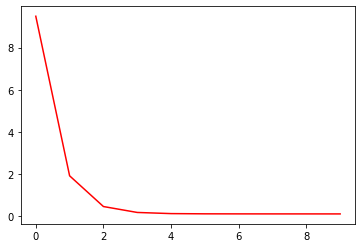

In [107]:
with torch.no_grad():
    plt.plot(epochs,los,'r')
    plt.show()

In [108]:
#2nd way of doing this
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    
    def forward(self,x):
        h=self.linear(x)
        return h
        

In [109]:
hypothesis2=linear_regression(input_size,output_size)
loss2=nn.MSELoss()
# gradient
gradient2=torch.optim.SGD(hypothesis2.parameters(),lr=0.01)

In [110]:
steps=[]
losss=[]
for i in range(10):
    steps.append(i)
    hypo=hypothesis2(X)
    l2=loss2(Y,hypo)
    losss.append(l2)
    #gradient
    
    l2.backward()
    
    gradient2.step()
    gradient2.zero_grad()
    
    [w1,w2]=hypothesis2.parameters()
    print(f'epoch{epoch+1}: w={w1[0][0].item():.3f},loss={l2:.3f}')
    
    

epoch10: w=0.153,loss=6.010
epoch10: w=0.261,loss=1.482
epoch10: w=0.307,loss=0.609
epoch10: w=0.328,loss=0.440
epoch10: w=0.336,loss=0.406
epoch10: w=0.339,loss=0.398
epoch10: w=0.340,loss=0.396
epoch10: w=0.340,loss=0.394
epoch10: w=0.340,loss=0.392
epoch10: w=0.339,loss=0.391


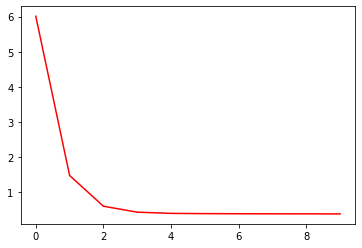

In [112]:
with torch.no_grad():
    plt.plot(steps,losss,'r')
    plt.show()